In [1]:
library(sqldf)
airq<-read.csv("nan_daily.csv")
colnames(airq)<-c("id","y","m","d","doy","avgtemp","avghumid","avgpm1","avgpm25","avgpm10")
sensorlist<-read.csv("sensorlist.csv")
airq<-sqldf("select a.*,s.tambol,s.amphoe from airq a, sensorlist s where a.id=s.sensorid")

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite
Loading required package: tcltk
Warning message:
“Quoted identifiers should have class SQL, use DBI::SQL() if the caller performs the quoting.”

In [2]:
airq <- sqldf('select * from airq where avgpm25<200')

In [3]:
library(ggplot2)

In [4]:
airq$month <- as.factor(airq$m)
p <- ggplot(airq, aes(month, avgpm25))

Saving 6.67 x 6.67 in image


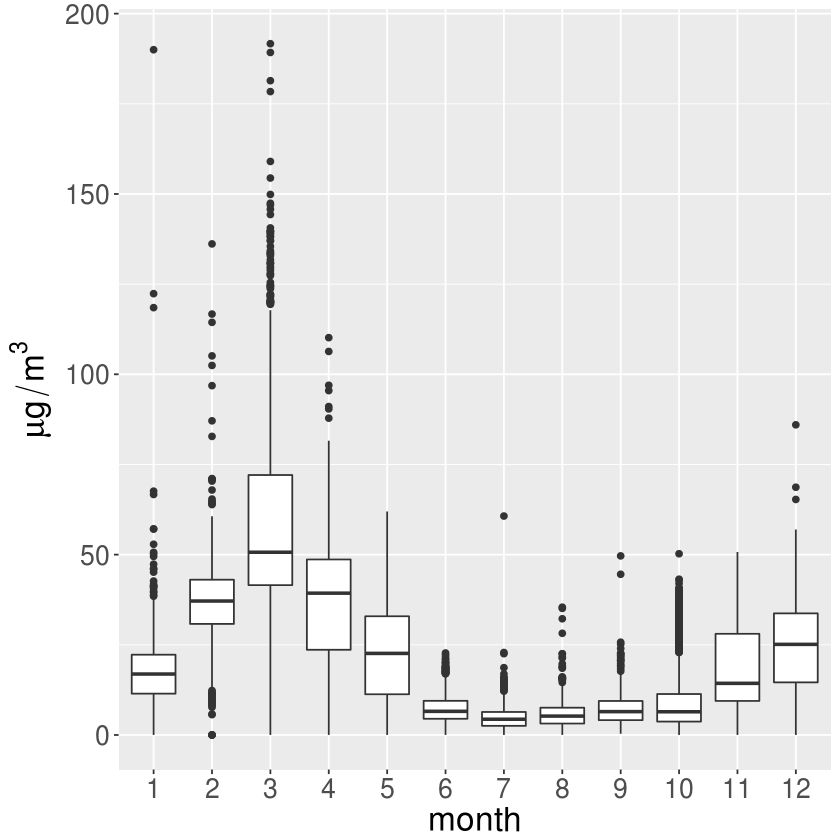

In [19]:
p+geom_boxplot()+theme(text = element_text(size=20)) +ylab(expression(paste(mu,g/m^3)))
ggsave("boxplot25.tiff",dpi=300)

In [20]:
p <- ggplot(airq, aes(month, avgpm1))

Saving 6.67 x 6.67 in image


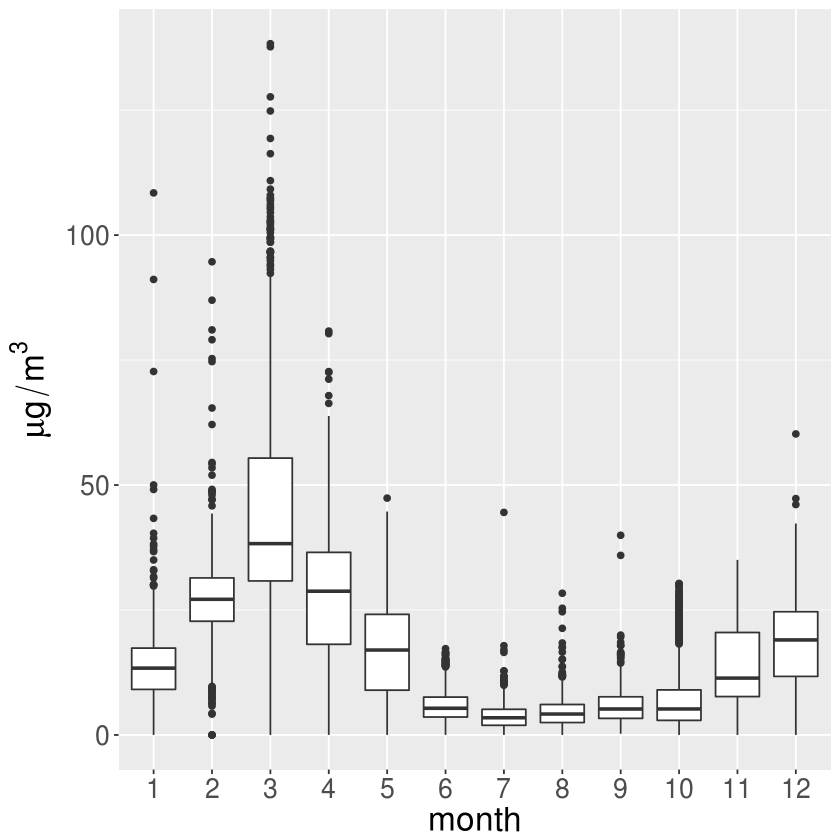

In [21]:
p+geom_boxplot()+theme(text = element_text(size=20)) +ylab(expression(paste(mu,g/m^3)))
ggsave("boxplot1.tiff",dpi=300)

In [22]:
p <- ggplot(airq, aes(month, avgpm10))

Saving 6.67 x 6.67 in image


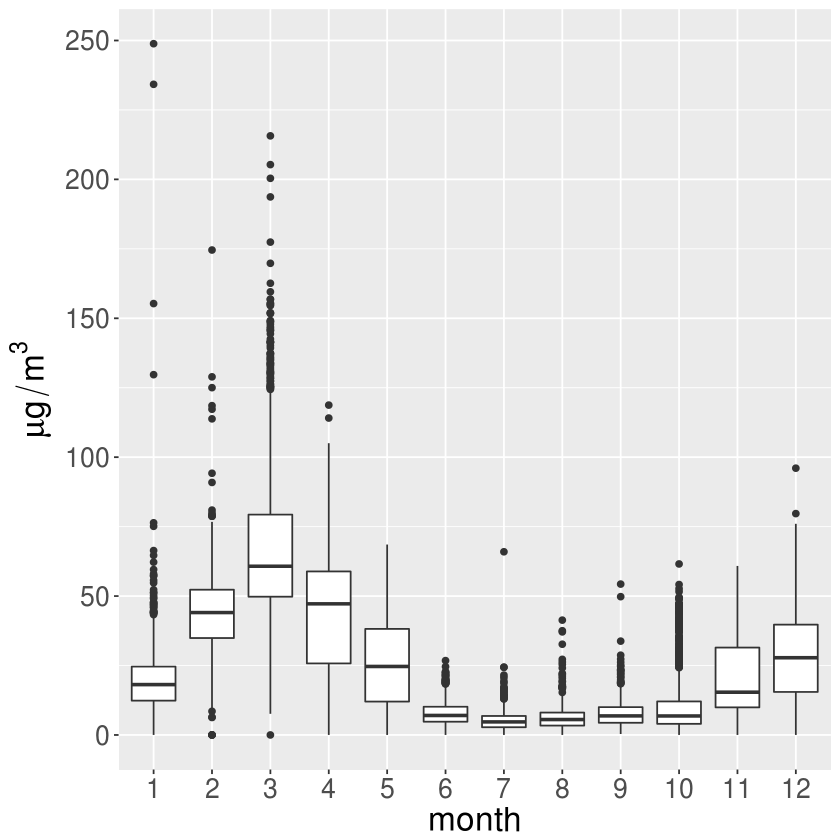

In [23]:
p+geom_boxplot()+theme(text = element_text(size=20)) +ylab(expression(paste(mu,g/m^3)))
ggsave("boxplot10.tiff",dpi=300)

In [24]:
totalsensor<-sqldf('select m,count(distinct id) from airq group by m')

In [25]:
totalsensor$month<-as.factor(totalsensor$m)

In [27]:
colnames(totalsensor)[2]<-"count"

Saving 6.67 x 6.67 in image


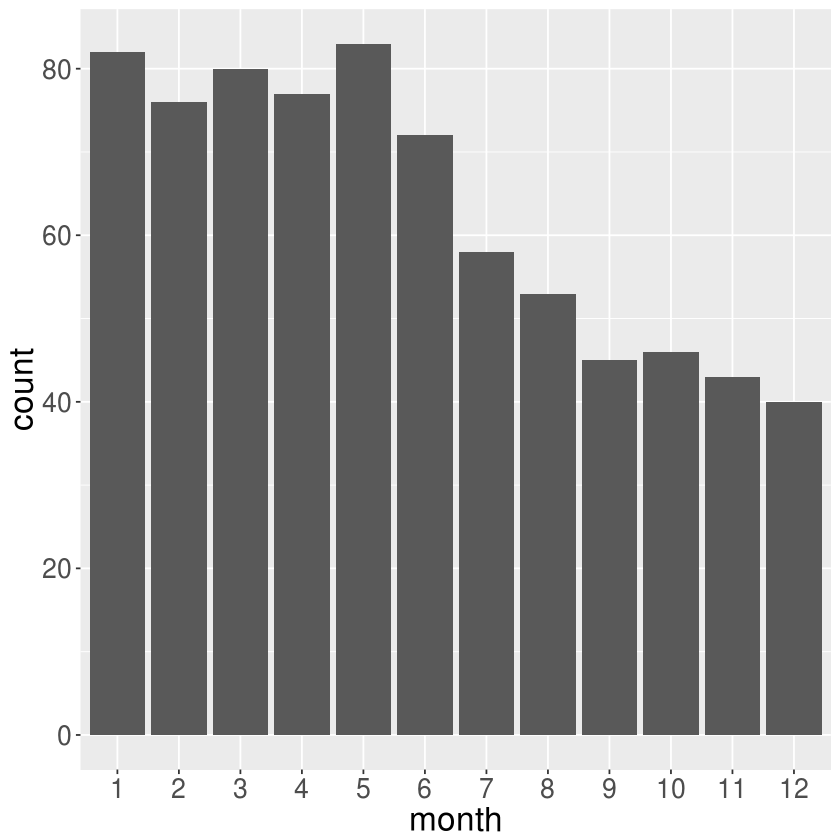

In [28]:
g <- ggplot(totalsensor, aes(month,count))
g + geom_col()+theme(text = element_text(size=20))
ggsave("bar.tiff",dpi=300)

In [55]:
sqldf('select * from airq where m=7 and avgpm10>50')

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,tambol,amphoe,mon,month
CU-S0081,2017,7,6,187,33.36455,57.0078,44.52425,60.69925,65.93993,ดุ่พงษ์,สันติสุข,7,7


In [56]:
sqldf('select * from airq where m=9 and avgpm10>47')

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,tambol,amphoe,mon,month
CU-S00083,2017,9,5,248,30.71222,59.61467,35.92467,44.55178,49.78200,สกาด,ปัว,9,9
CU-S00083,2017,9,11,254,30.64086,53.00418,39.94897,49.64966,54.30993,สกาด,ปัว,9,9


In [57]:
sqldf('select * from airq where m=9 and avgpm1>25')

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,tambol,amphoe,mon,month
CU-S00083,2017,9,5,248,30.71222,59.61467,35.92467,44.55178,49.78200,สกาด,ปัว,9,9
CU-S00083,2017,9,11,254,30.64086,53.00418,39.94897,49.64966,54.30993,สกาด,ปัว,9,9


In [58]:
sqldf('select * from airq where m=9 and avgpm25>30')

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,tambol,amphoe,mon,month
CU-S00083,2017,9,5,248,30.71222,59.61467,35.92467,44.55178,49.78200,สกาด,ปัว,9,9
CU-S00083,2017,9,11,254,30.64086,53.00418,39.94897,49.64966,54.30993,สกาด,ปัว,9,9


In [59]:
sqldf('select * from airq where m=4 and avgpm25>100')

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,tambol,amphoe,mon,month
CU-S0050,2017,4,28,118,36.24979,44.67755,80.79678,106.3331,114.0850,ยาบหัวนา,เวียงสา,4,4
CU-S0092,2017,4,22,112,36.32018,42.03267,80.28195,110.1599,118.7455,อ่ายนาไลย,เวียงสา,4,4
